## OpenCV Part-2

## Morphological Transformation

<pre>
* Morphological Transfomations are some simple operations based on the image shape.
* We from Morphological Transformations on the binary images , that's why we need mask to our Image using simple
  Threshold.

1)Kernel -Some Shape(Square,Rectangle,Circle) which we want to apply on the Image.
2)Dilation -The size of black marks are reduced
3)Erosion -By Using Erosion the sides of the corner are Eroded.
4)Opening -Erosion followed by Dilation.
5)Closing -Dilation followed by Erosion.
6)Morphological Gradient - Difference between Dilation & Erosion of an Image.
7)TopHat - Difference between Original Image & Opening of an Image.


</pre>

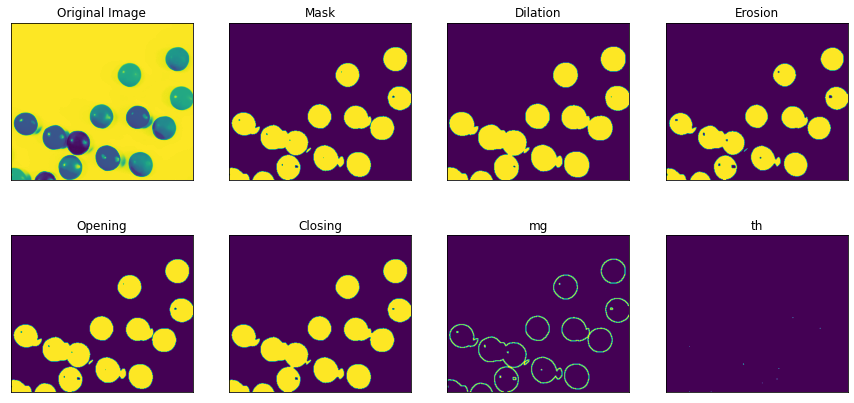

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))

img=cv2.imread('smarties.png',cv2.IMREAD_GRAYSCALE)
_,mask=cv2.threshold(img,220,255,cv2.THRESH_BINARY_INV)

kernal=np.ones((3,3),dtype=np.uint8)
dilation=cv2.dilate(mask,kernal,iterations=1)
erosion=cv2.erode(mask,kernal,iterations=1)
opening=cv2.morphologyEx(mask,cv2.MORPH_OPEN,kernal)
closing=cv2.morphologyEx(mask,cv2.MORPH_CLOSE,kernal)
mg=cv2.morphologyEx(mask,cv2.MORPH_GRADIENT,kernal)
th=cv2.morphologyEx(mask,cv2.MORPH_TOPHAT,kernal)

#matplotlib visualization
images=[img,mask,dilation,erosion,opening,closing,mg,th]
title=['Original Image','Mask','Dilation','Erosion','Opening','Closing','mg','th']

for i in range(len(images)):
    
    plt.subplot(4,4,i+1)
    plt.imshow(images[i])
    plt.xticks([]),plt.yticks([])
    plt.title(title[i])
plt.show()

## Smothing Images/Blurring Images

<pre>
* Smoothing or Blurring is the most commonly used operation in Image Preocessing.
* The most common smoothing operation is to remove noise in the images.
</pre>
<u><b>Filters available in OpenCV</b></u>
<pre>
* Homogeneous Filter - Most simple filter,each output pixel is the mean of its kernel neighbour 
* Gaussian Filter    - It is nothing but Using different weight kernel in both in X and y direction
* Median Filter      - It is something that replace each pixel value with the medisn of its neighbouring pixels.This 
                       method is great when dealing with "Salt and Pepper noise".
* Bilateral Filter   - Edges are preserved much better way
                       Highly effective in noise removal while keeping the edge sharp.
</pre>


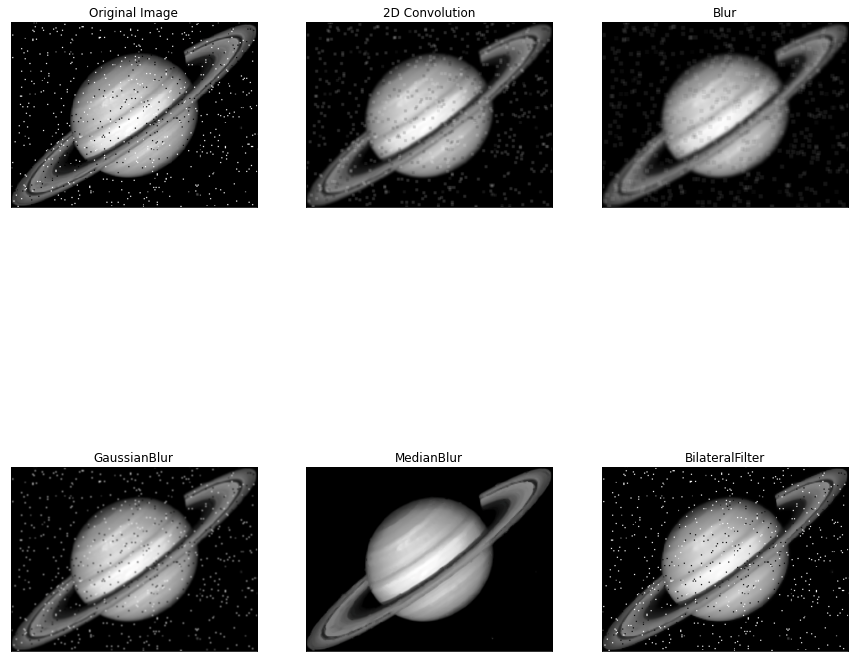

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15,15)) #Figure Size

img=cv2.imread('fig1.png') #Read the Image
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


kernel=np.ones((5,5),np.float32)/25
destination=cv2.filter2D(img,-1,kernel) #image,depth,kernel
blur=cv2.blur(img,(7,7))
gaussianblur=cv2.GaussianBlur(img,(5,5),0) #image,ksize,sigmaX
medianblur=cv2.medianBlur(img,5) 
bilateralfilter=cv2.bilateralFilter(img,9,75,75)



images=[img,destination,blur,gaussianblur,medianblur,bilateralfilter]
title=['Original Image','2D Convolution','Blur','GaussianBlur','MedianBlur','BilateralFilter']
for i in range(len(images)):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i])
    plt.title(title[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

## Image Gradients/ Edge Detection
<pre>
* An Image Gradient is a directional change in the intensity or color in an image.
* It is a fundamental building block in Image Processing.
</pre>
<pre>
<b>Image Gradient methods</b>
          * Laplacian 
          * SobelX
          * Sobel Y
</pre>

## Canny Edge Detection
 
<pre>
The canny Edge Detection is an edge detection operator that uses a multi-stage Algorithm to detect a wide range of edges in images.
</pre>
<pre>
<u><b>Canny Edge Detection Algorithm is composed of 5 Stage</b></u>
      1) Noise Reduction
      2) Gradient Calculation
      3) Non-maximum supression
      4) Double Threshold
      5) Edge Tracking by Hysteresis
</pre>

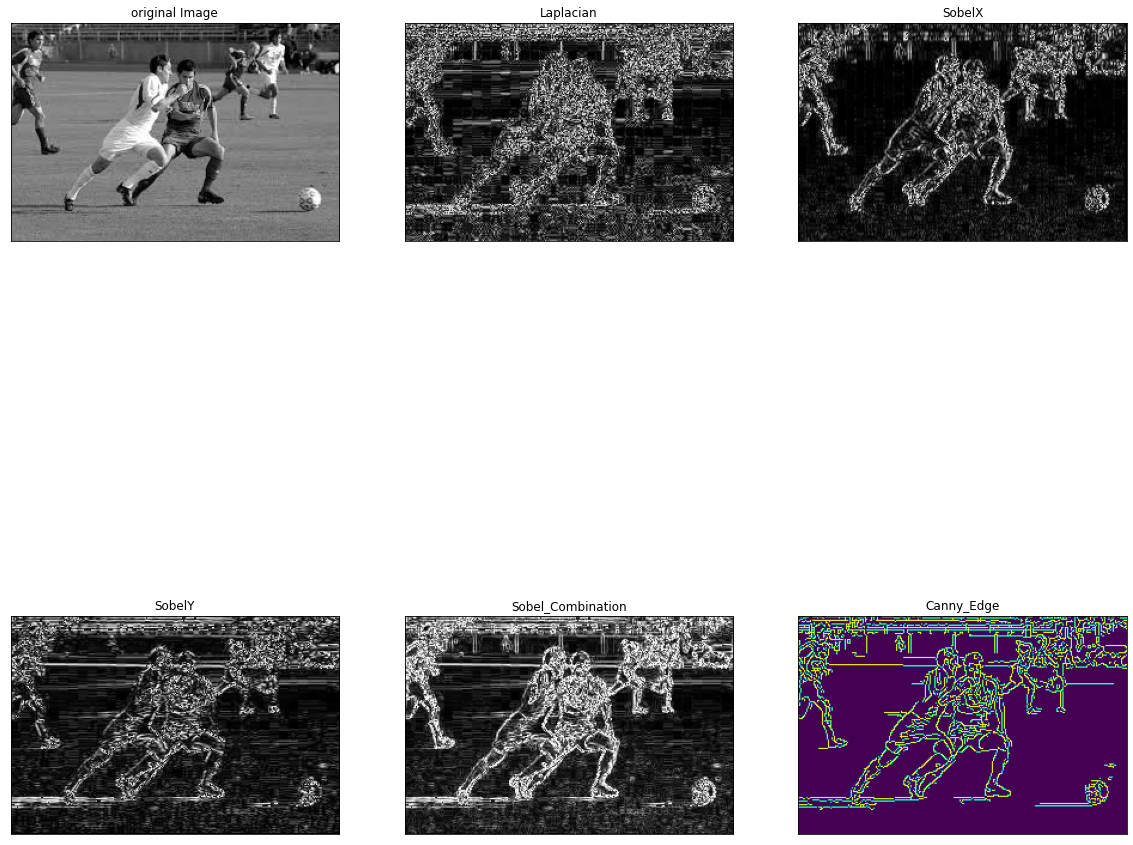

In [47]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(20,20)) #Figure Size
img=cv2.imread('soc1.jpg',cv2.IMREAD_GRAYSCALE)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)


Laplacian=cv2.Laplacian(img,cv2.CV_64F,ksize=3)
lap=np.uint8(np.absolute(Laplacian))
sobelX=cv2.Sobel(img,cv2.CV_64F,1,0)
sobelY=cv2.Sobel(img,cv2.CV_64F,0,1)
sobelX=np.uint8(np.absolute(sobelX))
sobelY=np.uint8(np.absolute(sobelY))
sobel_combination=cv2.bitwise_or(sobelX,sobelY)
canny_edge=cv2.Canny(img,threshold1=90,threshold2=200)


image=[img,lap,sobelX,sobelY,sobel_combination,canny_edge]
title=['original Image','Laplacian','SobelX','SobelY','Sobel_Combination','Canny_Edge']

for i in range(len(image)):
    plt.subplot(2,3,i+1)
    plt.imshow(image[i]),plt.title(title[i])
    plt.xticks([]),plt.yticks([])
plt.show()